# Hello! Welcome to the Simulator User Training Workshop :)

This notebook is to be used as a rough guide/demo for key simulator functions. If there are any questions, feel free to contact the devs at: wei.dai@ntu.edu.sg and zhihao.quek@ntu.edu.sg

# Timing & Synchronization of Agents

For Agent-based modelling (a key objective of this simulator), it is essential to ensure agents with different update rates are properly synchronized. This is done by using the **GlobalClock** and **Agent** classes from **Engine.GlobalClock.py**. A subclass for agents requiring non-fixed update intervals is also available, it is called **TimeTriggeredAgent**.

In [1]:
import numpy as np  # Very useful Python module for scientific computation & math
import pandas as pd  # Very useful Python module for data analysis

Now to give an idea of how Agent can be used to build generic Agents with given update rates, let's build an example child class using the Agent class. 

Each **update()** method essentially contains script elements that are supposed to be executed at a certain rate (based on the update rate of the agent). The following few cells show how to properly implement various types of **update()** methods using the **check_time()**, **check_time2()** and **update_next_update_time()** methods of the main Agent class. 

In [2]:
from Engine.GlobalClock import GlobalClock, Agent, TimeTriggeredAgent  

class PrintAgent(Agent):
    def __init__(self, update_rate, start_time, phase_delay):
        super().__init__(update_rate, start_time, phase_delay)
        
    def update(self, time):
        """By default, use this syntax to define actions."""
        if super().check_time(time):
            # USER SCRIPT FOR AGENT BEHAVIOUR GOES HERE
            print('Updating now, time now is: %.4f, next update time is %.4f'%(self.time, self.next_update_time))
            
    def update2(self, time):
        """If there is need to use the main update function more than one time in a single simulation timestep, use this. 
        Note that the next update time is no longer automatically updated. """
        if super().check_time2(time):
            # USER SCRIPT FOR AGENT BEHAVIOUR GOES HERE
            print('Updating now, time now is: %.4f, next update time is %.4f'%(self.time, self.next_update_time))
            
    def update3(self, time):
        """As per ^^ users using check_time2 to run must specify next update time."""
        if super().check_time2(time):
            # USER SCRIPT FOR AGENT BEHAVIOUR GOES HERE
            super().update_next_update_time()  # <-- all Agent objects have .interval attribute (1/update_rate)
            print('Updating now, time now is: %.4f, next update time is %.4f'%(self.time, self.next_update_time))
            
    

Let's see how the various **check_time()**, **check_time2()** and **update_next_update_time()** functions can be used to control Agent update behaviour.

#### Using check_time()

In [3]:
GC_update_rate = 10  # 10 Hz
GC_stop_time = 1

GC = GlobalClock(GC_update_rate,  # <--- Update rate of the global clock. Note: all Agents should have LOWER update rates.
                 GC_stop_time,  # <--- When the sim should stop running
                 start=0 # Start time for GlobalClock. It is 0 by default.
                )  

Agent1_update_rate = 5
Agent1_start_time = 0
Agent1_phase_delay = np.random.uniform(0, 1/Agent1_update_rate)
print('Agent1_phase_delay is: %.3f s'%Agent1_phase_delay)

Agent1 = PrintAgent(Agent1_update_rate, 
                    Agent1_start_time, 
                    phase_delay=Agent1_phase_delay
                   )

GC.reset_time()

while GC.time <= GC.stop:
    GC.update()
    Agent1.update(GC.time)

Agent1_phase_delay is: 0.010 s
Updating now, time now is: 0.1000, next update time is 0.2102
Updating now, time now is: 0.3000, next update time is 0.4102
Updating now, time now is: 0.5000, next update time is 0.6102
Updating now, time now is: 0.7000, next update time is 0.8102
Updating now, time now is: 0.9000, next update time is 1.0102
Updating now, time now is: 1.1000, next update time is 1.2102


Notice that the next update step occurs sometime **after** the expected next update time? This is due to the time resolution limit imposed by the GlobalClock update rate. Try adjusting **GC_update_rate** and see how it affects ^^. 

#### Using check_time2() - Error if user tries updating in the main script

In [4]:
GC_update_rate = 10  
GC_stop_time = 1

GC = GlobalClock(GC_update_rate,  
                 GC_stop_time,  
                 start=0 
                )  

Agent1_update_rate = 5
Agent1_start_time = 0
Agent1_phase_delay = np.random.uniform(0, 1/Agent1_update_rate)
print('Agent1_phase_delay is: %.3f s'%Agent1_phase_delay)

Agent1 = PrintAgent(Agent1_update_rate, 
                    Agent1_start_time, 
                    phase_delay=Agent1_phase_delay
                   )

GC.reset_time()

while GC.time <= GC.stop:
    GC.update()
    Agent1.update2(GC.time) 
    Agent1.update_next_update_time() # Update in the main clock script

Agent1_phase_delay is: 0.063 s
Updating now, time now is: 0.1000, next update time is 0.0632


Notice now that the if the user defined an update method in the child class (in this case, **PrintAgent**) that used **check_time2()** *without* including a line to refresh the next update interval (i.e. **update_next_update_time()**), then the script body **will only run once!**

#### Using check_time2() with update_next_update_time()

In [5]:
GC_update_rate = 10  
GC_stop_time = 1

GC = GlobalClock(GC_update_rate,  
                 GC_stop_time,  
                 start=0 
                )  

Agent1_update_rate = 5
Agent1_start_time = 0
Agent1_phase_delay = np.random.uniform(0, 1/Agent1_update_rate)
print('Agent1_phase_delay is: %.3f s'%Agent1_phase_delay)

Agent1 = PrintAgent(Agent1_update_rate, 
                    Agent1_start_time, 
                    phase_delay=Agent1_phase_delay
                   )

GC.reset_time()

while GC.time <= GC.stop:
    GC.update()
    Agent1.update3(GC.time) 

Agent1_phase_delay is: 0.122 s
Updating now, time now is: 0.2000, next update time is 0.3216
Updating now, time now is: 0.4000, next update time is 0.5216
Updating now, time now is: 0.6000, next update time is 0.7216
Updating now, time now is: 0.8000, next update time is 0.9216
Updating now, time now is: 1.0000, next update time is 1.1216


Now it works it properly! Yay :)

Let's set up a clock instance to use for subsequent simulations.

In [6]:
global_clock_update_rate = 240  # 240 Hz

clock = GlobalClock(update_rate=global_clock_update_rate, stop=300, start=0)

# Wind

First, let's start by modelling the wind, since this is (usually) a "global" agent that will interact with all A/C in a single simulation. 

In [7]:
from Engine.Wind import WindField

WindUpdateRate = 5  # Remember how agents have individual update rates? Here the 'Wind' agent has an update rate of 5 Hz
WindStartTime = 0

# Let's keep it simple for now and model a day with calm wind (std dev for all axis = 0).

Wind = WindField(WindUpdateRate, WindStartTime, 
                 auto_x=0.9, auto_y=0.9, auto_z=0,
                 std_x=0, std_y=0, std_z=0,
                 mean_x=0, mean_y=0, mean_z=0)

# FlightPlan

How to initialize and use the FlightPlan class to choose/design aircraft flight plan...

In [8]:
from Engine.FlightPlan import *

AC1_Wpt_Start_List = [np.array([0,0,0]), np.array([0,0,0])]
AC1_Wpt_Start_Time = [0, 25]
AC1_Wpt_End_List = [np.array([0,0,0]), np.array([100,100,100])]
AC1_Wpt_End_Time = [25, 125]
AC1_Mode_List = ['Hover', 'Direct_P2P']  # Currently, the 2 supported flight modes are 'Hover' and 'Direct_P2P'
AC1_Duration_List = [25, 100]
AC1_Leg_Spd = [0, 10]

AC1_FlightPlan = FlightPlan(AC1_Leg_Spd,
                            AC1_Mode_List,
                            AC1_Wpt_Start_List, AC1_Wpt_Start_Time,
                            AC1_Wpt_End_List, AC1_Wpt_End_Time, AC1_Duration_List)

AC1_FlightPlan.plan  # Let's take a look at the flightplan!

,Leg No.,Target Speed,Mode,Starting Wpt,EDT,Ending Wpt,ETA,Duration
0,1,0,Hover,"[0, 0, 0]",0,"[0, 0, 0]",25,25
1,2,10,Direct_P2P,"[0, 0, 0]",25,"[100, 100, 100]",125,100


^^ make sure the Starting/Ending Wpt and EDTs/ETAs/Duration tally! 

# Physics & Aircraft State

Let's start initializing/setting up our aircraft model to use for the simulation.

In [9]:
from Engine.Aircraft import AircraftType
from Engine.DragModel import DragModel
from Engine.State import State


# Define basic aircraft parameters

def calc_diameter(mass, option='random'):
    """Data for this function obtained from log-log plot of popular DJI quadrotors.
    For the various options: 
    random (default) --> randomizes calculated prop diameter based on a random multiplier
    fixed extrapolation --> disables the randomization ^^
    minimum --> uses a fixed multiplier of 0.8
    maximum --> uses a fixed multiplier of 1.2
    """
    if option == 'random':
        diameter = round(np.random.uniform(0.8, 1.2) * np.exp((0.3878 * np.log(mass) + 2.1387)), 1)
    if option == 'fixed extrapolation':
        diameter = round(np.exp((0.3878 * np.log(mass) + 2.1387)), 1)
    if option == 'minimum':
        diameter = round(0.8 * np.exp((0.3878 * np.log(mass) + 2.1387)), 1)
    if option == 'maximum':
        diameter = round(1.2 * np.exp((0.3878 * np.log(mass) + 2.1387)), 1)
    return diameter

AC1_AircraftType = AircraftType(mass=1.2, prop_diameter=calc_diameter(1.2), max_cruise_spd=20)

# Pass aircraft prop size info to dragmodel to calculate effective drag coefficient

AC1_DragModel = DragModel(AC1_AircraftType)  


# Define parameters to initialize AC1, e.g. physics update rate, initial position, velocity, rpy, etc. 

AC1_PhysicsUpdateRate = 240

AC1_Start_Time = 0
AC1_Ini_Pos = np.array([0,0,0])
AC1_Ini_Vel = np.array([0,0,0])
AC1_Ini_Pos_Err = np.array([0,0,0])
AC1_Ini_Vel_Err = np.array([0,0,0])
AC1_Ini_RPY = np.array([0,0,0])


# Initialize AC1 State! 

AC1_State = State(AC1_PhysicsUpdateRate, AC1_Start_Time, 
                  AC1_Ini_Pos, AC1_Ini_Vel, 
                  AC1_Ini_Pos_Err, AC1_Ini_Vel_Err, 
                  Wind.get_windspd(AC1_Start_Time, AC1_Ini_Pos), AC1_AircraftType, 
                  rpy=AC1_Ini_RPY)

# Multirotor Controller

Time to initialize the controller. The controller requires info from the flightplan, aircraft type, etc. to determine how the AC should maneuver, so it should be **initialized after those other agents**. 

In [10]:
from Engine.MultiRotorController import MultiRotorController

AC1_Controller_UpdateRate = 120

AC1_Controller = MultiRotorController(AC1_Controller_UpdateRate, AC1_Start_Time, AC1_FlightPlan, AC1_AircraftType,
                                      wpt_tol_hor=0, wpt_tol_vert=0, wpt_tol=10)

# Sensor Errors

To make the simulation a bit more realistic, let's simulate GPS position errors using RNG (similar to the wind simulation). For horizontal std dev values, please note that these values are specified separately for x/y axis. If you wish to set a radial std dev value, please scale the horizontal std devs by the necessary factor. The formula is included below! 

In [11]:
runs = 100000

x_auto = 0.994
y_auto = 0.994


GPS_Pos_Error_Hor_Std = 3.5 # (radial)
GPS_Pos_Error_Hor_Std1 = (GPS_Pos_Error_Hor_Std)/np.sqrt(0.5*(4-np.pi)) # Check formula! 

x1_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)
y1_err = np.random.uniform(0, GPS_Pos_Error_Hor_Std)


x1_err_l = []
y1_err_l = []
r1_err_l = []

for i in range(runs):
    x1_err = x_auto * x1_err + np.random.normal(0, GPS_Pos_Error_Hor_Std1 * np.sqrt(1 - x_auto**2))
    x1_err_l.append(x1_err)
    y1_err = y_auto * y1_err + np.random.normal(0, GPS_Pos_Error_Hor_Std1 * np.sqrt(1 - y_auto**2))
    y1_err_l.append(y1_err)
    r1_err_l.append(np.sqrt(x1_err**2 + y1_err**2))
    
    
print('STD_Formula_1, r std: %.3f, set value: %.1f'%(np.array(r1_err_l).std(), GPS_Pos_Error_Hor_Std))
print('STD_x_val_1: %.3f, set value: %.3f'%(np.array(x1_err_l).std(), GPS_Pos_Error_Hor_Std1))

STD_Formula_1, r std: 3.488, set value: 3.5
STD_x_val_1: 5.339, set value: 5.342


^^ you can check if the Cartesian-to-Polar formula is correct (for horizontal NSE std dev), either analytically or by running the short script above. 

In [12]:
from Engine.Sensors import NavUpdate, GPSPosNavUpdate

AC1_PosUpdateRate = 10
AC1_VelUpdateRate = 10
AC1_AccelUpdateRate = 100
AC1_AirSpdSensorUpdateRate = 100

GPS_horizontal_std = 3.5  # If you want, set this to 0 to turn lateral NSE off
GPS_horizontal_std = (GPS_horizontal_std)/np.sqrt(0.5*(4-np.pi))
GPS_vert_std = 3.5 # If you want, set this to 0 to turn vertical NSE off

AC1_Pos_Nav_Agent = GPSPosNavUpdate(AC1_PosUpdateRate, AC1_Start_Time, 
                                    0.994, 0.994, 0.994,  # <-- Autocor parameters for x, y, z axis
                                    GPS_horizontal_std, GPS_horizontal_std, GPS_vert_std,
                                    x_mean=0, y_mean=0, z_mean=0)
                                    # phase_delay=10 <-- manually set GPS phase delay during start-up (will rand if None)
AC1_Vel_Nav_Agent = NavUpdate(AC1_VelUpdateRate, AC1_Start_Time)
AC1_Accel_Nav_Agent = NavUpdate(AC1_AccelUpdateRate, AC1_Start_Time)
AC1_AirSpeedSensor = NavUpdate(AC1_AirSpdSensorUpdateRate, AC1_Start_Time)

# Tracking

This section is for modelling tracking systems. Depending on user's research area(s) this part can be skipped. 

In [13]:
from Engine.TrackingSystem import TrackingUnit, GroundStation


# Initialize Tracking System

AC1_TrackingUnit_UpdateRate = 1  # Update rate in Hz
AC1_Latency = 2.5  # Latency in seconds
AC1_Tracking_Availability = 1  # Between [0, 1], 0 --> 0 means not able to send info to GroundStation at all

AC1_TrackingUnit = TrackingUnit('AC1',  # <-- Aircraft Identity
                                AC1_TrackingUnit_UpdateRate, 
                                AC1_Start_Time, 
                                AC1_Latency, 
                                availability=AC1_Tracking_Availability,
                                latency_distribution=None, phase_delay=None)

Ground_UpdateRate = 20  # Update rate in Hz
Trackinator = GroundStation(Ground_UpdateRate, 0, phase_delay=0)


# Add AC1 to the tracking system so that the GroundStation is aware of which aircraft is which! 
# Useful if there are more than 1 aircraft in the simulation

Trackinator.add_airborne_tracker('AC1',  # <-- Aircraft Identity
                                 AC1_TrackingUnit)

# We're finally ready to simulate things! 

Let's give the simulator a run and visualize some flight parameters!

In [14]:
import time  # For simulator performance monitoring

# Time to run the simulation...

start = time.time()

while clock.time <= clock.stop:
    clock.update()
    if AC1_State.simstate == 0:  # If an aircraft reaches its final wpt, it will trigger the end of the sim. 
        # Change ^^ line if you have more than 1 aircraft!
        continue
    
    # Update aircraft state (i.e. kinematics)
    AC1_State.update(clock.time, AC1_DragModel, 
                     AC1_Controller, 
                     AC1_Pos_Nav_Agent, AC1_Vel_Nav_Agent, AC1_Accel_Nav_Agent,
                     AC1_AirSpeedSensor, 
                     Wind) 
    
    # Update various tracking units and the ground station
    AC1_TrackingUnit.update_and_queue(clock.time, AC1_State, 
                                      pos_error_agent=None, vel_error_agent=None)
    Trackinator.track_and_update_trajectories(clock.time)
    
end = time.time()
compute_time = end-start
simulated_time = AC1_State.time
speedup = simulated_time/compute_time

print('Simulation took: %.3f sec, simulated flight time: %.3f sec, total speedup: %.3f times'
      %(compute_time, simulated_time, speedup))

CHANGE FLIGHT LEG
Next Wpt is:  [100 100 100]
Hdg is:  [100 100 100]
Controller mode changed from Hover to Direct_P2P
CHANGE FLIGHT LEG
Simulation took: 13.600 sec, simulated flight time: 42.583 sec, total speedup: 3.131 times


# Visualization of Trajectories and Critical Flight Parameters

### Before we visualize things...

...after each simulation run, trajectory information can be retrieved from both the **State** (in this instance **AC1_State**) and **GroundStation** (in this instance **Trackinator**) objects.

State objects return a pandas dataframe containing multiple flight parameters.

However, GroundStation objects only store transmitted time, received time, position and velocity of each aircraft. As it has fewer parameters, a numpy array is used to store aircraft information instead. Two helper functions are included below to help process the trajectory data. 

In [15]:
def extract_from_df(df, key, idx):
    """Extracts single column from dataframe cells with 3D point values. """
    df_len = len(df)
    return np.concatenate(df[key].to_numpy()).reshape(df_len, 3)[:,idx]

def special_concat(trajectory):
    """For use with trajectory info extracted from GroundStation object. """
    return np.concatenate(trajectory).reshape(len(trajectory), 8)  # 8 is the length of each mini array

Now let's get the get the trajectory information from the State and GroundStation objects (AC1_State and Trackinator). 

Let's focus on the **ground truth** trajectory first (i.e. trajectory data from State).

In [16]:
# Getting AC1_State trajectory info (i.e. ground truth). Recall it is a pandas dataframe.

AC1_trajectory = AC1_State.get_trajectory();
AC1_trajectory.head()

,gt_pos,gt_vel,wind_spd,air_vel,accel,gt_pos_err,gt_vel_err,gt_hor_err,accel_err,rpy,rpy_rate,rpy_accel,commanded_net_force,controller_pos_err,thrust,time
0,"[0.0, 0.0, -3.7367505157457254e-06]","[0.0, 0.0, -0.0017936402475579483]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, -0.4304736594139076]","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 0.0]",8.080694,"[0.0, 0.0, 0.0]","[8.781837747272055e-06, 0.0001882343289865958,...","[0.004215282118690587, 0.09035247791356599, 0.0]","[1.0116677084857408, 21.684594699255836, 0.0]","[0.29058884804086077, -0.013558572201149427, -...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 11.255431608703311]",0.004167
1,"[1.533180916877573e-08, -7.152864305664559e-10...","[7.35926840101235e-06, -3.433374866718988e-07,...","[0.0, 0.0, 0.0]","[0.0, 0.0, -0.0017936402475579483]","[0.001766224416242964, -8.240099680125571e-05,...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 0.0]",8.080694,"[0.0, 0.0, 0.0]","[2.62791599092008e-05, 0.0005632807201978606, ...","[0.00418343251903521, 0.08966978986784115, 0.0]","[-0.007643903917290592, -0.1638451309739623, 0.0]","[0.29058884804086077, -0.013558572201149427, -...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0021194692994915567, -9.888119616150686e-05...",0.008333
2,"[9.187500028890188e-08, -4.286313687742547e-09...","[2.9381463336648205e-05, -1.3707555967726248e-...","[0.0, 0.0, 0.0]","[7.35926840101235e-06, -3.433374866718988e-07,...","[0.005285326784552605, -0.0002465803464241742,...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 0.0]",8.080694,"[0.0, 0.0, 0.0]","[4.358356621883722e-05, 0.0009341920400337306,...","[0.004122682509590272, 0.08836764365337643, 0.0]","[-0.014580002266785123, -0.31251509147153184, ...","[0.29058884804086077, -0.013558572201149427, -...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0063423932469389354, -0.0002958964672836039...",0.012500
3,"[2.904460673232608e-07, -1.3550400110214991e-0...","[6.593264883984407e-05, -3.076005886014149e-06...","[0.0, 0.0, 0.0]","[2.9381463336648205e-05, -1.3707555967726248e-...","[0.008772284520767008, -0.0004092600694179659,...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 0.0]",8.080694,"[0.0, 0.0, 0.0]","[6.0628941279247285e-05, 0.001299551117742, 0.0]","[0.00405909751940656, 0.08700471364659289, 0.0]","[-0.015260397644090814, -0.32710320162805206, ...","[0.29056769007975836, -0.013557585102812459, -...","[-8.071912353704466, 0.37662700130117044, 0.86...","[0.010526748036029236, -0.0004911123917346116,...",0.016667
4,"[6.710949720871308e-07, -3.130910340195532e-08...","[0.00011677882544681352, -5.448171694021209e-0...","[0.0, 0.0, 0.0]","[6.593264883984407e-05, -3.076005886014149e-06...","[0.01220308238567267, -0.0005693197939216943, ...","[-8.071912445579466, 0.37662700558748413, 0.86...","[0.0, 0.0, 0.0]",8.080694,"[0.0, 0.0, 0.0]","[7.741854985183744e-05, 0.0016594279322357495,...","[0.003999914595436714, 0.0857361573104068, 0.0]","[-0.014203901752762947, -0.30445352068466136, ...","[0.29056769007975836, -0.013557585102812459, -...","[-8.071912353704466, 0.37662700130117044, 0.86...","[0.01464371854743033, -0.0006831846710676897, ...",0.020833


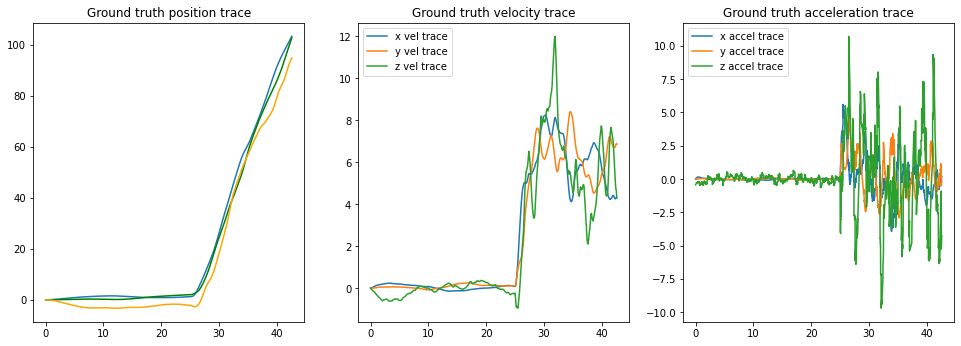

In [17]:
import matplotlib.pyplot as plt

# Let's view ground truth position/velocity/accel

fig, axs = plt.subplots(ncols=3, figsize=(16.5,5.5))

axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 0), label='x pos trace')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 1), label='y pos trace', c='g')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 2), label='z pos trace', c='orange')
axs[0].set_title('Ground truth position trace')

axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 0), label='x vel trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 1), label='y vel trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 2), label='z vel trace')
axs[1].legend()
axs[1].set_title('Ground truth velocity trace')

axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel', 0), label='x accel trace')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel', 1), label='y accel trace')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel', 2), label='z accel trace')
axs[2].legend()
axs[2].set_title('Ground truth acceleration trace')

plt.show()

Does the ground truth match the chosen flight plan? 

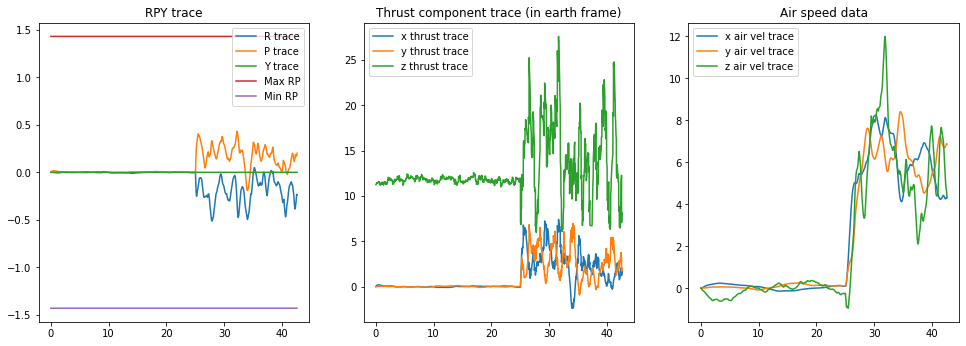

In [18]:
# Let's view ground truth RPY and Thrust

fig,axs = plt.subplots(ncols=3, figsize=(16.5,5.5))

axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'rpy', 0), label='R trace')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'rpy', 1), label='P trace')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'rpy', 2), label='Y trace')
max_rpy_array = np.empty(len(AC1_trajectory['time']))
max_rpy_array[:] = AC1_AircraftType.max_roll_pitch
axs[0].plot(AC1_trajectory['time'], max_rpy_array, label='Max RP')
axs[0].plot(AC1_trajectory['time'], -max_rpy_array, label='Min RP')
axs[0].legend()
axs[0].set_title('RPY trace')


axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'thrust', 0), label='x thrust trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'thrust', 1), label='y thrust trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'thrust', 2), label='z thrust trace')
axs[1].legend()
axs[1].set_title('Thrust component trace (in earth frame)')

axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'air_vel', 0), label='x air vel trace')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'air_vel', 1), label='y air vel trace')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'air_vel', 2), label='z air vel trace')
axs[2].legend()
axs[2].set_title('Air speed data')


plt.show()

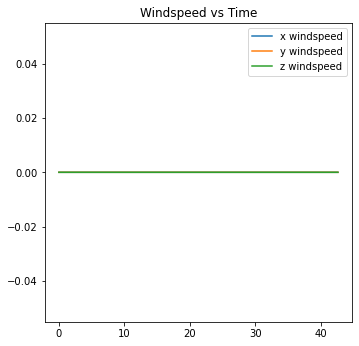

In [19]:
# Let's view WIND SPEED

fig,axs = plt.subplots(ncols=1, figsize=(5.5,5.5))

axs.plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'wind_spd', 0), label='x windspeed')
axs.plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'wind_spd', 1), label='y windspeed')
axs.plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'wind_spd', 2), label='z windspeed')
axs.legend()
axs.set_title('Windspeed vs Time')
#axs.set_xlim(0,20)

plt.show()

NSE hor radial error std: 1.577
 x std: 2.120, y std: 2.671, z std: 1.563


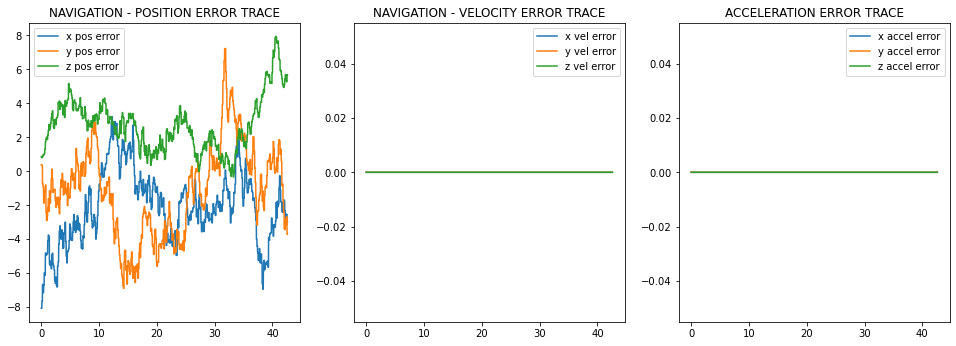

In [20]:
# Let's view NAVIGATIONAL ERRORS for position/velocity/accel

fig,axs = plt.subplots(ncols=3, figsize=(16.5,5.5))

axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos_err', 0), label='x pos error')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos_err', 1), label='y pos error')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos_err', 2), label='z pos error')
axs[0].legend()
axs[0].set_title('NAVIGATION - POSITION ERROR TRACE')
# axs[0].set_xlim(0,1)


axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel_err', 0), label='x vel error')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel_err', 1), label='y vel error')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel_err', 2), label='z vel error')
axs[1].legend()
axs[1].set_title('NAVIGATION - VELOCITY ERROR TRACE')

axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel_err', 0), label='x accel error')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel_err', 1), label='y accel error')
axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'accel_err', 2), label='z accel error')
axs[2].legend()
axs[2].set_title('ACCELERATION ERROR TRACE')

print('NSE hor radial error std: %.3f'%(AC1_trajectory['gt_hor_err'].std()) + 
      '\n x std: %.3f, y std: %.3f, z std: %.3f'%((extract_from_df(AC1_trajectory, 'gt_pos_err', 0).std(), 
                                                   extract_from_df(AC1_trajectory, 'gt_pos_err', 1).std(), 
                                                   extract_from_df(AC1_trajectory, 'gt_pos_err', 2).std())))

plt.show()

Now let's look at data from the **tracking system**. We can compare it to the ground truth trajectory.

In [21]:
# Let's get the data from the tracking system now. Recall that this is a numpy array, and includes sensor error(s).

AC1_Trk_Trajectory = special_concat(Trackinator.trajectories['AC1'].trajectory)
AC1_Trk_trans_time = AC1_Trk_Trajectory[:,0]
AC1_Trk_rec_time = AC1_Trk_Trajectory[:,1]
AC1_Trk_est_pos = AC1_Trk_Trajectory[:,2:5]
AC1_Trk_est_vel = AC1_Trk_Trajectory[:,5:8]

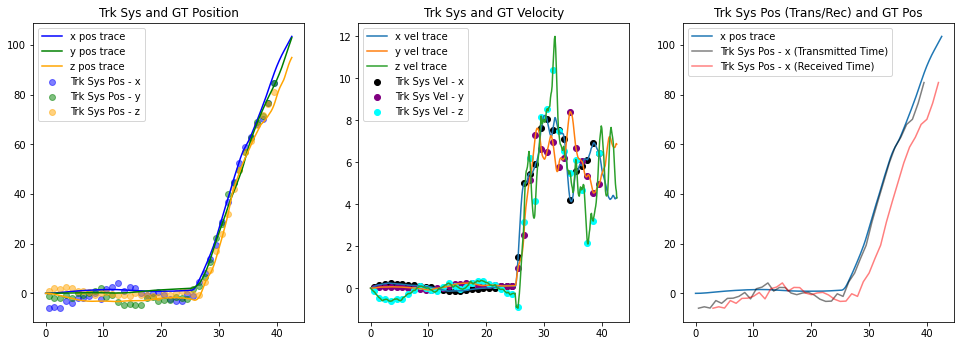

In [22]:
# Compare reported position and velocities (trk system) vs ground truth

fig, axs = plt.subplots(ncols=3, figsize=(16.5,5.5))

axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 0), label='x pos trace', c='blue')
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 1), label='y pos trace', c='g')
axs[0].scatter(AC1_Trk_trans_time, AC1_Trk_est_pos[:,0], c='blue', label='Trk Sys Pos - x', alpha=0.5)
axs[0].scatter(AC1_Trk_trans_time, AC1_Trk_est_pos[:,1], c='g', label='Trk Sys Pos - y', alpha=0.5)
axs[0].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 2), label='z pos trace', c='orange')
axs[0].scatter(AC1_Trk_trans_time, AC1_Trk_est_pos[:,2], c='orange', label='Trk Sys Pos - z', alpha=0.5)

axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 0), label='x vel trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 1), label='y vel trace')
axs[1].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_vel', 2), label='z vel trace')
axs[1].scatter(AC1_Trk_trans_time, AC1_Trk_est_vel[:,0], c='black', label='Trk Sys Vel - x')
axs[1].scatter(AC1_Trk_trans_time, AC1_Trk_est_vel[:,1], c='purple', label='Trk Sys Vel - y')
axs[1].scatter(AC1_Trk_trans_time, AC1_Trk_est_vel[:,2], c='cyan', label='Trk Sys Vel - z')

axs[2].plot(AC1_trajectory['time'], extract_from_df(AC1_trajectory, 'gt_pos', 0), label='x pos trace')
axs[2].plot(AC1_Trk_trans_time, AC1_Trk_est_pos[:,0], c='black', label='Trk Sys Pos - x (Transmitted Time)', alpha=0.5)
axs[2].plot(AC1_Trk_rec_time, AC1_Trk_est_pos[:,0], c='r', label='Trk Sys Pos - x (Received Time)', alpha=0.5)

axs[0].legend()
axs[0].set_title('Trk Sys and GT Position')
axs[1].legend()
axs[1].set_title('Trk Sys and GT Velocity')
axs[2].legend()
axs[2].set_title('Trk Sys Pos (Trans/Rec) and GT Pos')

plt.show()

## We can use Jupyter's powerful visualization capabilities to see the 3D trajectory :) 

After running the following cell, you can click and drag on the 3D image in the output cell to shift the viewpoint of the trajectory! 

<IPython.core.display.Javascript object>


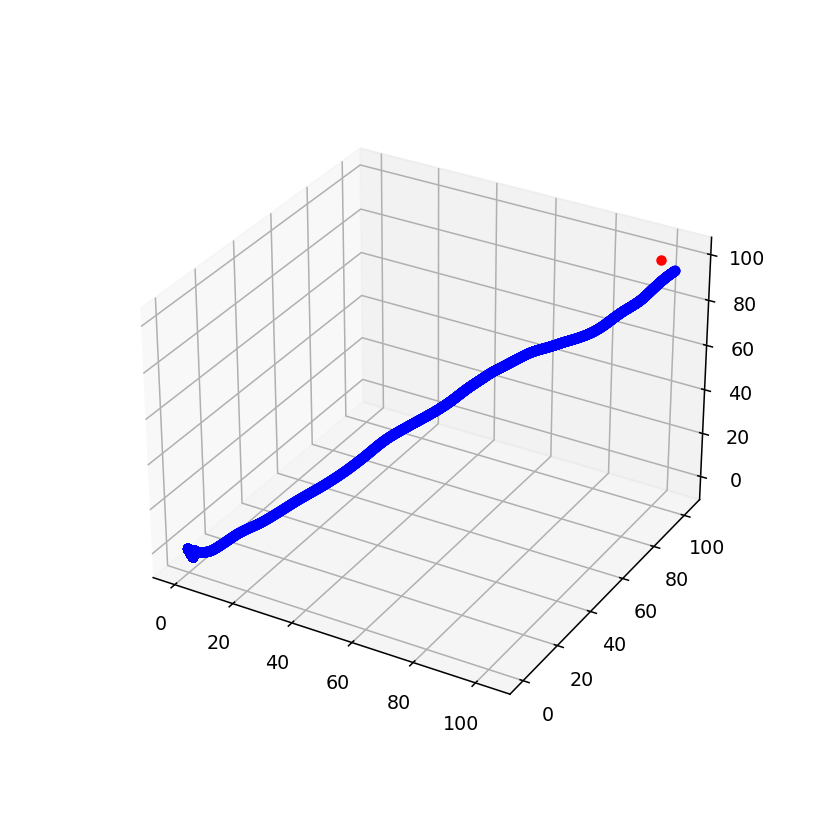

[0 0 0]
[0 0 0]
[100 100 100]


In [24]:
%matplotlib notebook  # Magic command in Jupyter for manipulating interactive matplotlib plots

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(extract_from_df(AC1_trajectory, 'gt_pos', 0), 
           extract_from_df(AC1_trajectory, 'gt_pos', 1), 
           extract_from_df(AC1_trajectory, 'gt_pos', 2), c='b')

xx, yy, zz = AC1_FlightPlan.plan.iloc[0]['Starting Wpt']
ax.scatter(xx, yy, zz, c='g')
print(AC1_FlightPlan.plan.iloc[0]['Starting Wpt'])

for wpt in AC1_FlightPlan.plan['Ending Wpt']:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    print(wpt)
    
# ax.set_xlim(-10, 510)
# ax.set_ylim(-100, 100)
# ax.set_zlim(-50,50)

plt.show()

# Thanks for following through the notebook!

Excercise time: try to recreate the squarish trajectory shown in the intro slides. 
You may use the following waypoints: (0,0,0), (0, 400, 400), (400, 400, 400), (400,0,100) and (0, 0, 100)

Feel free to play around with different settings. 

Happy "flying"!